In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import time
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, cross_val_score

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler


from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [2]:
train_data = pd.read_csv('C:\\Users\\USER\\Desktop\\KAGGLE DATASETS\\Developing Staff Promotion Algorithm\\train.csv')
test_data = pd.read_csv('C:\\Users\\USER\\Desktop\\KAGGLE DATASETS\\Developing Staff Promotion Algorithm\\test.csv')

In [3]:
train_data.shape

(38312, 19)

In [4]:
test_data.shape

(16496, 18)

In [5]:
#train_data.isnull().sum()

In [6]:
#test_data.isnull().sum()

In [7]:
train_data.nunique()

EmployeeNo                             38312
Division                                   9
Qualification                              3
Gender                                     2
Channel_of_Recruitment                     3
Trainings_Attended                        10
Year_of_birth                             49
Last_performance_score                     6
Year_of_recruitment                       35
Targets_met                                2
Previous_Award                             2
Training_score_average                    61
State_Of_Origin                           37
Foreign_schooled                           2
Marital_Status                             3
Past_Disciplinary_Action                   2
Previous_IntraDepartmental_Movement        2
No_of_previous_employers                   7
Promoted_or_Not                            2
dtype: int64

In [8]:
train_data.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0


In [9]:
train_data['Last_performance_score'].unique()

array([12.5,  7.5,  2.5, 10. ,  0. ,  5. ])

In [10]:
train_data['Qualification'] = train_data.groupby(['Division', 'Channel_of_Recruitment', 'Foreign_schooled', 'Last_performance_score'])['Qualification'].transform(lambda x: x.loc[x.first_valid_index()])
test_data['Qualification'] = test_data.groupby(['Division', 'Channel_of_Recruitment', 'Foreign_schooled', 'Last_performance_score'])['Qualification'].transform(lambda x: x.loc[x.first_valid_index()])

In [11]:
#train_data['Qualification'] = train_data['Qualification'].fillna(method='ffill')
#test_data['Qualification'] = test_data['Qualification'].fillna(method='ffill')

print(train_data.isnull().sum().max())
print(test_data.isnull().sum().max())

0
0


In [12]:
train_data['Qualification'].isnull().sum()

0

In [13]:
train_data['Past_Disciplinary_Action'] = train_data['Past_Disciplinary_Action'].map({'No':0, 'Yes':1})
test_data['Past_Disciplinary_Action'] = test_data['Past_Disciplinary_Action'].map({'No':0, 'Yes':1})

train_data['Foreign_schooled'] = train_data['Foreign_schooled'].map({'No':0, 'Yes':1})
test_data['Foreign_schooled'] = test_data['Foreign_schooled'].map({'No':0, 'Yes':1})

train_data['Previous_IntraDepartmental_Movement'] = train_data['Previous_IntraDepartmental_Movement'].map({'No':0, 'Yes':1})
test_data['Previous_IntraDepartmental_Movement'] = test_data['Previous_IntraDepartmental_Movement'].map({'No':0, 'Yes':1})

train_data['No_of_previous_employers'] = train_data['No_of_previous_employers'].replace({'More than 5' : 7})
test_data['No_of_previous_employers'] = test_data['No_of_previous_employers'].replace({'More than 5' : 7})

In [14]:
train_data['No_of_previous_employers'] = train_data['No_of_previous_employers'].astype(str)
test_data['No_of_previous_employers'] = test_data['No_of_previous_employers'].astype(str)

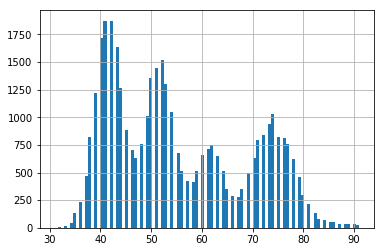

In [15]:
train_data['Training_score_average'].hist(bins=100)

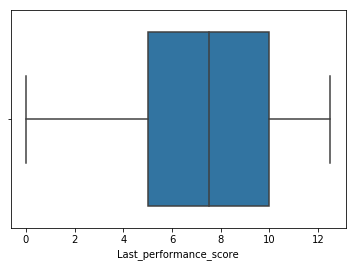

In [16]:
sns.boxplot(x=train_data['Last_performance_score'])

In [17]:
train_data['Age_of_employment'] = train_data['Year_of_recruitment'] - train_data['Year_of_birth']
test_data['Age_of_employment'] = test_data['Year_of_recruitment'] - test_data['Year_of_birth']

In [18]:
train_data['Train_score_avg_per_age'] = train_data['Training_score_average']/train_data['Age_of_employment']
test_data['Train_score_avg_per_age'] = test_data['Training_score_average']/test_data['Age_of_employment']

train_data['Last_perf_score_per_trainings'] = train_data['Last_performance_score']/train_data['Trainings_Attended']
test_data['Last_perf_score_per_trainings'] = test_data['Last_performance_score']/test_data['Trainings_Attended']

train_data['Last_perf_score_per_train_score'] = train_data['Last_performance_score']/train_data['Training_score_average']
test_data['Last_perf_score_per_train_score'] = test_data['Last_performance_score']/test_data['Training_score_average']

train_data['Penalty'] = train_data['Previous_Award'] - train_data['Past_Disciplinary_Action']
test_data['Penalty'] = test_data['Previous_Award'] - test_data['Past_Disciplinary_Action']

train_data['Disappointing'] = train_data['Foreign_schooled'] - train_data['Past_Disciplinary_Action']
test_data['Disappointing'] = test_data['Foreign_schooled'] - test_data['Past_Disciplinary_Action']

train_data['Discipline_change_Dept'] = train_data['Past_Disciplinary_Action'] * train_data['Previous_IntraDepartmental_Movement']
test_data['Discipline_change_Dept'] = test_data['Past_Disciplinary_Action'] * test_data['Previous_IntraDepartmental_Movement']

train_data['Target_Award'] = train_data['Targets_met'] + train_data['Previous_Award']
test_data['Target_Award'] = test_data['Targets_met'] + test_data['Previous_Award']

In [19]:
train_data['Penalty'] = train_data['Penalty'].replace({-1: 1, 0:2, 1:3})
test_data['Penalty'] = test_data['Penalty'].replace({-1: 1, 0:2, 1:3})

train_data['Disappointing'] = train_data['Disappointing'].replace({-1: 1, 0:2, 1:3})
test_data['Disappointing'] = test_data['Disappointing'].replace({-1: 1, 0:2, 1:3})

In [20]:
np.sort(train_data['State_Of_Origin'].unique())

array(['ABIA', 'ADAMAWA', 'AKWA IBOM', 'ANAMBRA', 'BAUCHI', 'BAYELSA',
       'BENUE', 'BORNO', 'CROSS RIVER', 'DELTA', 'EBONYI', 'EDO', 'EKITI',
       'ENUGU', 'FCT', 'GOMBE', 'IMO', 'JIGAWA', 'KADUNA', 'KANO',
       'KATSINA', 'KEBBI', 'KOGI', 'KWARA', 'LAGOS', 'NASSARAWA', 'NIGER',
       'OGUN', 'ONDO', 'OSUN', 'OYO', 'PLATEAU', 'RIVERS', 'SOKOTO',
       'TARABA', 'YOBE', 'ZAMFARA'], dtype=object)

In [21]:
np.sort(train_data['Year_of_birth'].unique())

array([1950, 1952, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001], dtype=int64)

In [22]:
np.sort(test_data['Year_of_birth'].unique())

array([1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001],
      dtype=int64)

In [23]:
test_data.shape

(16496, 26)

In [24]:
train_data.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not', 'Age_of_employment', 'Train_score_avg_per_age',
       'Last_perf_score_per_trainings', 'Last_perf_score_per_train_score',
       'Penalty', 'Disappointing', 'Discipline_change_Dept', 'Target_Award'],
      dtype='object')

In [25]:
train_data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,No_of_previous_employers,Promoted_or_Not,Age_of_employment,Train_score_avg_per_age,Last_perf_score_per_trainings,Last_perf_score_per_train_score,Penalty,Disappointing,Discipline_change_Dept,Target_Award
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,...,0,0,25,1.640000,6.250000,0.304878,2,2,0,1
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,...,0,0,24,2.166667,6.250000,0.240385,2,3,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,...,0,0,25,1.680000,3.750000,0.178571,2,3,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,...,1,0,27,1.555556,0.833333,0.059524,2,3,0,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,...,1,0,22,3.500000,2.500000,0.097403,2,3,0,0


In [26]:
train_data.select_dtypes(exclude='object').columns

Index(['Trainings_Attended', 'Year_of_birth', 'Last_performance_score',
       'Year_of_recruitment', 'Targets_met', 'Previous_Award',
       'Training_score_average', 'Foreign_schooled',
       'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement',
       'Promoted_or_Not', 'Age_of_employment', 'Train_score_avg_per_age',
       'Last_perf_score_per_trainings', 'Last_perf_score_per_train_score',
       'Penalty', 'Disappointing', 'Discipline_change_Dept', 'Target_Award'],
      dtype='object')

In [27]:
train_data.select_dtypes(include='object').columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'State_Of_Origin', 'Marital_Status',
       'No_of_previous_employers'],
      dtype='object')

In [28]:
train_data.drop(['EmployeeNo', 'Year_of_birth', 'Year_of_recruitment'], axis=1, inplace=True)

testId = test_data['EmployeeNo']
test_data.drop(['EmployeeNo', 'Year_of_birth', 'Year_of_recruitment'], axis=1, inplace=True)

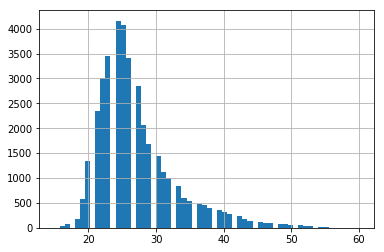

In [29]:
train_data['Age_of_employment'].hist(bins=60)

In [30]:
train_data.head(3)

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,...,No_of_previous_employers,Promoted_or_Not,Age_of_employment,Train_score_avg_per_age,Last_perf_score_per_trainings,Last_perf_score_per_train_score,Penalty,Disappointing,Discipline_change_Dept,Target_Award
0,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,12.5,1,0,41,ANAMBRA,...,0,0,25,1.640000,6.25,0.304878,2,2,0,1
1,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,12.5,0,0,52,ANAMBRA,...,0,0,24,2.166667,6.25,0.240385,2,3,0,0
2,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,7.5,0,0,42,KATSINA,...,0,0,25,1.680000,3.75,0.178571,2,3,0,0


In [31]:
train_data.columns

Index(['Division', 'Qualification', 'Gender', 'Channel_of_Recruitment',
       'Trainings_Attended', 'Last_performance_score', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not', 'Age_of_employment', 'Train_score_avg_per_age',
       'Last_perf_score_per_trainings', 'Last_perf_score_per_train_score',
       'Penalty', 'Disappointing', 'Discipline_change_Dept', 'Target_Award'],
      dtype='object')

In [32]:
train_data.shape

(38312, 24)

In [33]:
#1. ************Qualification--Division

In [34]:
qual_div_train = train_data.groupby(['Qualification', 'Division'], as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()#.rename(columns={'mean' : 'Training_score_avg_Qual_Div_mean', 'sum' : 'Training_score_avg_Qual_Div_sum'})
qual_div_test = test_data.groupby(['Qualification', 'Division'], as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()



col = ['Qualification', 'Division']

for var in qual_div_train.columns.levels[0]:
    if var not in col:
        for stat in qual_div_train.columns.levels[1][:-1]:
            col.append('Qual_Div_%s_%s' % (var, stat))
            
    
qual_div_train.columns = col
qual_div_test.columns = col


train_data = pd.merge(train_data, qual_div_train, on=['Qualification', 'Division'], how='left')
test_data = pd.merge(test_data, qual_div_test, on=['Qualification', 'Division'], how='left')




In [35]:
#2. ************Channel_of_Recruitment--Division

In [36]:
cor_div_train = train_data.groupby(['Channel_of_Recruitment', 'Division'], as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()#.rename(columns={'mean' : 'Training_score_avg_Qual_Div_mean', 'sum' : 'Training_score_avg_Qual_Div_sum'})
cor_div_test = test_data.groupby(['Channel_of_Recruitment', 'Division'], as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()



col = ['Channel_of_Recruitment', 'Division']

for var in cor_div_train.columns.levels[0]:
    if var not in col:
        for stat in cor_div_train.columns.levels[1][:-1]:
            col.append('Cor_Div_%s_%s' % (var, stat))
            
    
cor_div_train.columns = col
cor_div_test.columns = col


train_data = pd.merge(train_data, cor_div_train, on=['Channel_of_Recruitment', 'Division'], how='left')
test_data = pd.merge(test_data, cor_div_test, on=['Channel_of_Recruitment', 'Division'], how='left')




In [37]:
#3. Channel_of_Recruitment -- Qualification

In [38]:
cor_qual_train = train_data.groupby(['Channel_of_Recruitment', 'Qualification'], as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()#.rename(columns={'mean' : 'Training_score_avg_Qual_Div_mean', 'sum' : 'Training_score_avg_Qual_Div_sum'})
cor_qual_test = test_data.groupby(['Channel_of_Recruitment', 'Qualification'], as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()



col = ['Channel_of_Recruitment', 'Qualification']

for var in cor_qual_train.columns.levels[0]:
    if var not in col:
        for stat in cor_qual_train.columns.levels[1][:-1]:
            col.append('Cor_Qual_%s_%s' % (var, stat))
            
    
cor_qual_train.columns = col
cor_qual_test.columns = col


train_data = pd.merge(train_data, cor_qual_train, on=['Channel_of_Recruitment', 'Qualification'], how='left')
test_data = pd.merge(test_data, cor_qual_test, on=['Channel_of_Recruitment', 'Qualification'], how='left')




In [39]:
#4. Qualification, Division, Channel_of_Recruitment

In [40]:
qual_div_cor_train = train_data.groupby(['Qualification', 'Division', 'Channel_of_Recruitment'], as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()#.rename(columns={'mean' : 'Training_score_avg_Qual_Div_mean', 'sum' : 'Training_score_avg_Qual_Div_sum'})
qual_div_cor_test = test_data.groupby(['Qualification', 'Division', 'Channel_of_Recruitment'], as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()



col = ['Qualification', 'Division', 'Channel_of_Recruitment']

for var in qual_div_cor_train.columns.levels[0]:
    if var not in col:
        for stat in qual_div_cor_train.columns.levels[1][:-1]:
            col.append('Qual_Div_Cor_%s_%s' % (var, stat))
            
    
qual_div_cor_train.columns = col
qual_div_cor_test.columns = col


train_data = pd.merge(train_data, qual_div_cor_train, on=['Qualification', 'Division', 'Channel_of_Recruitment'], how='left')
test_data = pd.merge(test_data, qual_div_cor_test, on=['Qualification', 'Division', 'Channel_of_Recruitment'], how='left')




In [41]:
#5. State_of_Origin, Channel_of_Recruitment, Division

In [42]:
state_cor_div_train = train_data.groupby(['State_Of_Origin', 'Channel_of_Recruitment', 'Division'], as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()#.rename(columns={'mean' : 'Training_score_avg_Qual_Div_mean', 'sum' : 'Training_score_avg_Qual_Div_sum'})
state_cor_div_test = test_data.groupby(['State_Of_Origin', 'Channel_of_Recruitment', 'Division'], as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()



col = ['State_Of_Origin', 'Channel_of_Recruitment', 'Division']

for var in state_cor_div_train.columns.levels[0]:
    if var not in col:
        for stat in state_cor_div_train.columns.levels[1][:-1]:
            col.append('State_Cor_Div_%s_%s' % (var, stat))
            
    
state_cor_div_train.columns = col
state_cor_div_test.columns = col


train_data = pd.merge(train_data, state_cor_div_train, on=['State_Of_Origin', 'Channel_of_Recruitment', 'Division'], how='left')
test_data = pd.merge(test_data, state_cor_div_test, on=['State_Of_Origin', 'Channel_of_Recruitment', 'Division'], how='left')




In [43]:
#6. Qualification, Division, Previous_Intradepartmental_Movement

In [44]:
qual_div_dept_train = train_data.groupby(['Qualification', 'Division', 'Previous_IntraDepartmental_Movement'], as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()#.rename(columns={'mean' : 'Training_score_avg_Qual_Div_mean', 'sum' : 'Training_score_avg_Qual_Div_sum'})
qual_div_dept_test = test_data.groupby(['Qualification', 'Division', 'Previous_IntraDepartmental_Movement'], as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()



col = ['Qualification', 'Division', 'Previous_IntraDepartmental_Movement']

for var in qual_div_dept_train.columns.levels[0]:
    if var not in col:
        for stat in qual_div_dept_train.columns.levels[1][:-1]:
            col.append('Qual_Div_Dept_%s_%s' % (var, stat))
            
    
qual_div_dept_train.columns = col
qual_div_dept_test.columns = col


train_data = pd.merge(train_data, qual_div_dept_train, on=['Qualification', 'Division', 'Previous_IntraDepartmental_Movement'], how='left')
test_data = pd.merge(test_data, qual_div_dept_test, on=['Qualification', 'Division', 'Previous_IntraDepartmental_Movement'], how='left')




In [45]:
#7. Foreign_Schooled, Channel_of_Recruitment, Division

In [46]:
for_cor_div_train = train_data.groupby(['Foreign_schooled', 'Channel_of_Recruitment', 'Division'], as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()#.rename(columns={'mean' : 'Training_score_avg_Qual_Div_mean', 'sum' : 'Training_score_avg_Qual_Div_sum'})
for_cor_div_test = test_data.groupby(['Foreign_schooled', 'Channel_of_Recruitment', 'Division'], as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()



col = ['Foreign_schooled', 'Channel_of_Recruitment', 'Division']

for var in for_cor_div_train.columns.levels[0]:
    if var not in col:
        for stat in for_cor_div_train.columns.levels[1][:-1]:
            col.append('For_Cor_Div_%s_%s' % (var, stat))
            
    
for_cor_div_train.columns = col
for_cor_div_test.columns = col


train_data = pd.merge(train_data, for_cor_div_train, on=['Foreign_schooled', 'Channel_of_Recruitment', 'Division'], how='left')
test_data = pd.merge(test_data, for_cor_div_test, on=['Foreign_schooled', 'Channel_of_Recruitment', 'Division'], how='left')




In [47]:
#8. State

In [48]:
state_train = train_data.groupby('State_Of_Origin', as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()
state_test = test_data.groupby('State_Of_Origin', as_index=False)[['Training_score_average', 'Trainings_Attended', 'Last_performance_score']].agg(['mean', 'sum']).reset_index()

col = ['State_Of_Origin']

for var in state_train.columns.levels[0]:
    if var not in col:
        for stat in state_train.columns.levels[1][:-1]:
            col.append('State_%s_%s' % (var, stat))
            
    
state_train.columns = col
state_test.columns = col


train_data = pd.merge(train_data, state_train, on='State_Of_Origin', how='left')
test_data = pd.merge(test_data, state_test, on='State_Of_Origin', how='left')

In [50]:
print(train_data.shape)
print(test_data.shape)

(38312, 72)
(16496, 71)


In [51]:
train_data.select_dtypes(include='object').columns

Index(['Division', 'Qualification', 'Gender', 'Channel_of_Recruitment',
       'State_Of_Origin', 'Marital_Status', 'No_of_previous_employers'],
      dtype='object')

In [52]:
train_data.select_dtypes(exclude='object').columns

Index(['Trainings_Attended', 'Last_performance_score', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'Foreign_schooled',
       'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement',
       'Promoted_or_Not', 'Age_of_employment', 'Train_score_avg_per_age',
       'Last_perf_score_per_trainings', 'Last_perf_score_per_train_score',
       'Penalty', 'Disappointing', 'Discipline_change_Dept', 'Target_Award',
       'Qual_Div_Training_score_average_mean',
       'Qual_Div_Training_score_average_sum',
       'Qual_Div_Trainings_Attended_mean', 'Qual_Div_Trainings_Attended_sum',
       'Qual_Div_Last_performance_score_mean',
       'Qual_Div_Last_performance_score_sum',
       'Cor_Div_Training_score_average_mean',
       'Cor_Div_Training_score_average_sum', 'Cor_Div_Trainings_Attended_mean',
       'Cor_Div_Trainings_Attended_sum', 'Cor_Div_Last_performance_score_mean',
       'Cor_Div_Last_performance_score_sum',
       'Cor_Qual_Training_score_average_mean

Text(0.5, 1.0, 'QQ-Plot for Age')

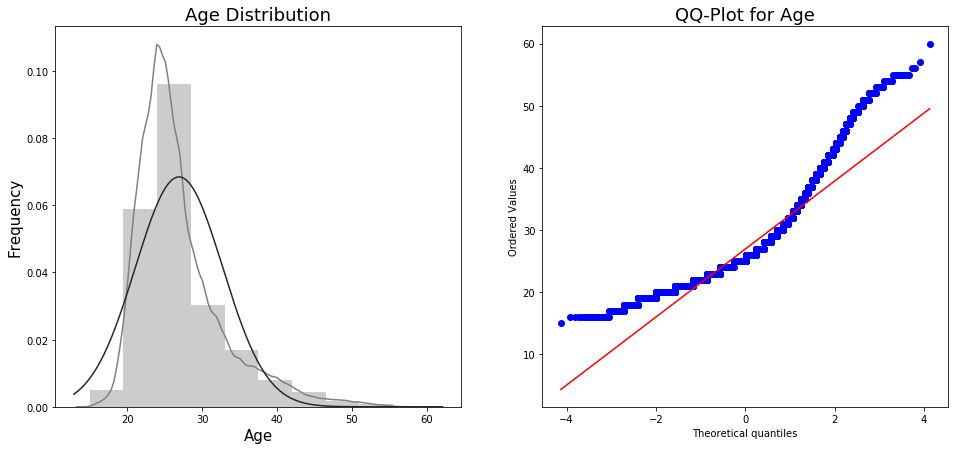

In [53]:
fig, ax = plt.subplots(figsize=(16, 7), nrows=1, ncols=2)

ax1 = sns.distplot(train_data.Age_of_employment, fit=norm, color='gray', bins=10, ax=ax[0])
ax1.set_title('Age Distribution', size=18)
ax1.set_xlabel('Age', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2 = ax[1]
stats.probplot(train_data['Age_of_employment'], plot = ax2)
ax2.set_title('QQ-Plot for Age', size=18)

Text(0.5, 1.0, 'QQ-Plot for Age')

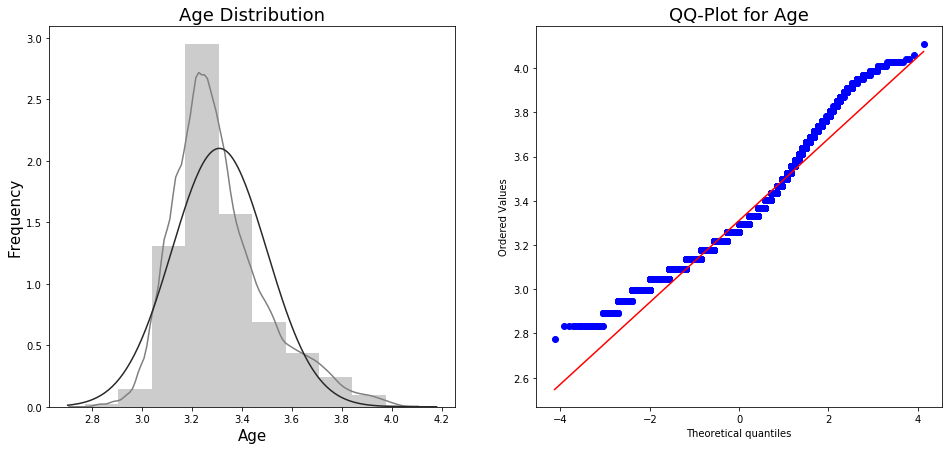

In [54]:
fig, ax = plt.subplots(figsize=(16, 7), nrows=1, ncols=2)

ax1 = sns.distplot(np.log1p(train_data.Age_of_employment), fit=norm, color='gray', bins=10, ax=ax[0])
ax1.set_title('Age Distribution', size=18)
ax1.set_xlabel('Age', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2 = ax[1]
stats.probplot(np.log1p(train_data['Age_of_employment']), plot = ax2)
ax2.set_title('QQ-Plot for Age', size=18)

In [55]:
train_data['Age_of_employment'] = np.log1p(train_data['Age_of_employment'])
test_data['Age_of_employment'] = np.log1p(test_data['Age_of_employment'])

Text(0.5, 1.0, 'QQ-Plot for Age')

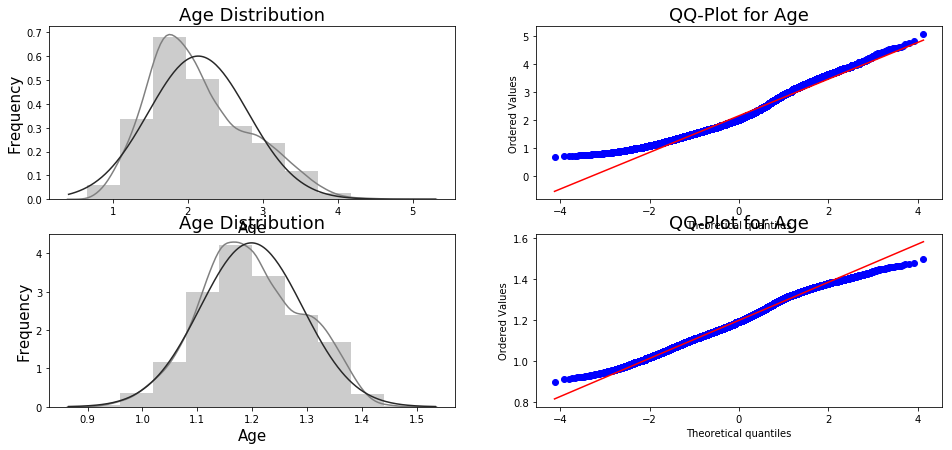

In [56]:
fig, ax = plt.subplots(figsize=(16, 7), nrows=2, ncols=2)

ax1 = sns.distplot(train_data.Train_score_avg_per_age, fit=norm, color='gray', bins=10, ax=ax[0][0])
ax1.set_title('Age Distribution', size=18)
ax1.set_xlabel('Age', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2 = ax[0][1]
stats.probplot(train_data['Train_score_avg_per_age'], plot = ax2)
ax2.set_title('QQ-Plot for Age', size=18)

ax3 = sns.distplot((train_data.Train_score_avg_per_age**(1/4)), fit=norm, color='gray', bins=10, ax=ax[1][0])
ax3.set_title('Age Distribution', size=18)
ax3.set_xlabel('Age', size=15)
ax3.set_ylabel('Frequency', size=15)

ax4 = ax[1][1]
stats.probplot((train_data['Train_score_avg_per_age']**(1/4)), plot = ax4)
ax4.set_title('QQ-Plot for Age', size=18)

In [57]:
train_data['Train_score_avg_per_age'] = train_data['Train_score_avg_per_age']**(1/4)
test_data['Train_score_avg_per_age'] = test_data['Train_score_avg_per_age']**(1/4)

In [58]:
train_data['Last_perf_score_per_train_score'] = train_data['Last_perf_score_per_train_score']**(1/3)
test_data['Last_perf_score_per_train_score'] = test_data['Last_perf_score_per_train_score']**(1/3)

In [60]:
cols = [
    'Targets_met', 'Previous_Award', 'Foreign_schooled', 'Past_Disciplinary_Action', 
    'Previous_IntraDepartmental_Movement', 'Target_Award'
]

for i in cols:
    train_data[i] = train_data[i].astype(str)
    test_data[i] = test_data[i].astype(str)

In [63]:
promoted_or_not = train_data['Promoted_or_Not']

train_num = train_data.drop('Promoted_or_Not', axis=1).select_dtypes(exclude='object')
test_num = test_data.select_dtypes(exclude='object')

train_cat = train_data.select_dtypes(include='object')
test_cat = test_data.select_dtypes(include='object')

train_cat['label'] = 1
test_cat['label'] = 0

In [64]:
combined = pd.concat([train_cat, test_cat], axis=0)#.reset_index(drop=True)

In [65]:
combined = pd.get_dummies(combined, columns=combined.columns[:-1], drop_first=True)

train_cat = combined[combined['label']==1]
test_cat = combined[combined['label']==0]

In [66]:
train_cat.drop('label', axis=1, inplace=True)
test_cat.drop('label', axis=1, inplace=True)

In [67]:
train_data = pd.concat([train_num, train_cat, promoted_or_not], axis=1)
test_data = pd.concat([test_num, test_cat], axis=1)

In [68]:
train_data.shape

(38312, 123)

In [69]:
test_data.shape

(16496, 122)

In [70]:
train_data.head()

,Trainings_Attended,Last_performance_score,Training_score_average,Age_of_employment,Train_score_avg_per_age,Last_perf_score_per_trainings,Last_perf_score_per_train_score,Penalty,Disappointing,Discipline_change_Dept,...,Previous_IntraDepartmental_Movement_1,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_7,Target_Award_1,Target_Award_2,Promoted_or_Not
0,2,12.5,41,3.258097,1.131647,6.250000,0.673042,2,2,0,...,0,0,0,0,0,0,0,1,0,0
1,2,12.5,52,3.218876,1.213244,6.250000,0.621778,2,3,0,...,0,0,0,0,0,0,0,0,0,0
2,2,7.5,42,3.258097,1.138485,3.750000,0.563124,2,3,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2.5,42,3.332205,1.116790,0.833333,0.390448,2,3,0,...,0,1,0,0,0,0,0,0,0,0
4,3,7.5,77,3.135494,1.367782,2.500000,0.460105,2,3,0,...,0,1,0,0,0,0,0,0,0,0


In [71]:
X, y = train_data.drop('Promoted_or_Not', axis=1), train_data['Promoted_or_Not']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [72]:
Counter(y_train)

Counter({1: 2431, 0: 26303})

In [73]:
26303/2431

10.819827231591937

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import VotingClassifier

In [77]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline, make_pipeline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import Pipeline

<h3>Catboost</h3>

In [83]:
boost = CatBoostClassifier(iterations=950, depth=6, learning_rate=0.052)

cross_val_score(boost, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='f1', n_jobs=-1).mean()

0.4979276414763484

In [84]:
model = CatBoostClassifier(iterations=950, depth=6, learning_rate=0.052)
model.fit(X_train, y_train)

0:	learn: 0.6305408	total: 260ms	remaining: 4m 6s
1:	learn: 0.5757919	total: 424ms	remaining: 3m 21s
2:	learn: 0.5213354	total: 632ms	remaining: 3m 19s
3:	learn: 0.4862177	total: 856ms	remaining: 3m 22s
4:	learn: 0.4579333	total: 1.1s	remaining: 3m 27s
5:	learn: 0.4249428	total: 1.31s	remaining: 3m 26s
6:	learn: 0.4026972	total: 1.56s	remaining: 3m 30s
7:	learn: 0.3802329	total: 1.77s	remaining: 3m 28s
8:	learn: 0.3620510	total: 1.98s	remaining: 3m 27s
9:	learn: 0.3441887	total: 2.21s	remaining: 3m 27s
10:	learn: 0.3246054	total: 2.42s	remaining: 3m 26s
11:	learn: 0.3141791	total: 2.67s	remaining: 3m 28s
12:	learn: 0.3044113	total: 2.87s	remaining: 3m 26s
13:	learn: 0.2963128	total: 3.08s	remaining: 3m 26s
14:	learn: 0.2875313	total: 3.29s	remaining: 3m 24s
15:	learn: 0.2807474	total: 3.51s	remaining: 3m 24s
16:	learn: 0.2756109	total: 3.73s	remaining: 3m 24s
17:	learn: 0.2686868	total: 3.96s	remaining: 3m 25s
18:	learn: 0.2616321	total: 4.19s	remaining: 3m 25s
19:	learn: 0.2566024	tot

159:	learn: 0.1651207	total: 34.6s	remaining: 2m 50s
160:	learn: 0.1650940	total: 34.9s	remaining: 2m 50s
161:	learn: 0.1650451	total: 35.2s	remaining: 2m 50s
162:	learn: 0.1650426	total: 35.4s	remaining: 2m 50s
163:	learn: 0.1649660	total: 35.6s	remaining: 2m 50s
164:	learn: 0.1648880	total: 35.8s	remaining: 2m 50s
165:	learn: 0.1648761	total: 36s	remaining: 2m 49s
166:	learn: 0.1647726	total: 36.2s	remaining: 2m 49s
167:	learn: 0.1645923	total: 36.4s	remaining: 2m 49s
168:	learn: 0.1645603	total: 36.6s	remaining: 2m 48s
169:	learn: 0.1644786	total: 36.8s	remaining: 2m 48s
170:	learn: 0.1644510	total: 37s	remaining: 2m 48s
171:	learn: 0.1644424	total: 37.2s	remaining: 2m 48s
172:	learn: 0.1644295	total: 37.4s	remaining: 2m 47s
173:	learn: 0.1643675	total: 37.6s	remaining: 2m 47s
174:	learn: 0.1643672	total: 37.7s	remaining: 2m 46s
175:	learn: 0.1642974	total: 37.9s	remaining: 2m 46s
176:	learn: 0.1642766	total: 38.1s	remaining: 2m 46s
177:	learn: 0.1642348	total: 38.3s	remaining: 2m 4

316:	learn: 0.1579673	total: 1m 9s	remaining: 2m 18s
317:	learn: 0.1579263	total: 1m 9s	remaining: 2m 18s
318:	learn: 0.1578932	total: 1m 9s	remaining: 2m 17s
319:	learn: 0.1578617	total: 1m 9s	remaining: 2m 17s
320:	learn: 0.1578405	total: 1m 10s	remaining: 2m 17s
321:	learn: 0.1578059	total: 1m 10s	remaining: 2m 17s
322:	learn: 0.1578031	total: 1m 10s	remaining: 2m 16s
323:	learn: 0.1577157	total: 1m 10s	remaining: 2m 16s
324:	learn: 0.1576711	total: 1m 10s	remaining: 2m 16s
325:	learn: 0.1576379	total: 1m 11s	remaining: 2m 15s
326:	learn: 0.1575979	total: 1m 11s	remaining: 2m 15s
327:	learn: 0.1575346	total: 1m 11s	remaining: 2m 15s
328:	learn: 0.1575246	total: 1m 11s	remaining: 2m 15s
329:	learn: 0.1574168	total: 1m 11s	remaining: 2m 14s
330:	learn: 0.1573718	total: 1m 11s	remaining: 2m 14s
331:	learn: 0.1573086	total: 1m 12s	remaining: 2m 14s
332:	learn: 0.1572549	total: 1m 12s	remaining: 2m 13s
333:	learn: 0.1572493	total: 1m 12s	remaining: 2m 13s
334:	learn: 0.1572215	total: 1m 

470:	learn: 0.1535323	total: 1m 40s	remaining: 1m 42s
471:	learn: 0.1535313	total: 1m 40s	remaining: 1m 42s
472:	learn: 0.1535163	total: 1m 41s	remaining: 1m 41s
473:	learn: 0.1535160	total: 1m 41s	remaining: 1m 41s
474:	learn: 0.1534728	total: 1m 41s	remaining: 1m 41s
475:	learn: 0.1534675	total: 1m 41s	remaining: 1m 41s
476:	learn: 0.1533911	total: 1m 42s	remaining: 1m 41s
477:	learn: 0.1533869	total: 1m 42s	remaining: 1m 41s
478:	learn: 0.1533242	total: 1m 42s	remaining: 1m 41s
479:	learn: 0.1532999	total: 1m 43s	remaining: 1m 40s
480:	learn: 0.1532996	total: 1m 43s	remaining: 1m 40s
481:	learn: 0.1532683	total: 1m 43s	remaining: 1m 40s
482:	learn: 0.1532366	total: 1m 43s	remaining: 1m 40s
483:	learn: 0.1531914	total: 1m 44s	remaining: 1m 40s
484:	learn: 0.1531744	total: 1m 44s	remaining: 1m 40s
485:	learn: 0.1531368	total: 1m 44s	remaining: 1m 40s
486:	learn: 0.1531161	total: 1m 45s	remaining: 1m 39s
487:	learn: 0.1531041	total: 1m 45s	remaining: 1m 39s
488:	learn: 0.1531029	total:

624:	learn: 0.1503955	total: 2m 16s	remaining: 1m 10s
625:	learn: 0.1503847	total: 2m 16s	remaining: 1m 10s
626:	learn: 0.1503840	total: 2m 16s	remaining: 1m 10s
627:	learn: 0.1503838	total: 2m 16s	remaining: 1m 10s
628:	learn: 0.1503810	total: 2m 17s	remaining: 1m 9s
629:	learn: 0.1503806	total: 2m 17s	remaining: 1m 9s
630:	learn: 0.1503802	total: 2m 17s	remaining: 1m 9s
631:	learn: 0.1503592	total: 2m 17s	remaining: 1m 9s
632:	learn: 0.1502948	total: 2m 17s	remaining: 1m 9s
633:	learn: 0.1502855	total: 2m 18s	remaining: 1m 8s
634:	learn: 0.1502724	total: 2m 18s	remaining: 1m 8s
635:	learn: 0.1502310	total: 2m 18s	remaining: 1m 8s
636:	learn: 0.1502307	total: 2m 18s	remaining: 1m 8s
637:	learn: 0.1501962	total: 2m 19s	remaining: 1m 8s
638:	learn: 0.1501958	total: 2m 19s	remaining: 1m 7s
639:	learn: 0.1501698	total: 2m 19s	remaining: 1m 7s
640:	learn: 0.1501498	total: 2m 19s	remaining: 1m 7s
641:	learn: 0.1501466	total: 2m 20s	remaining: 1m 7s
642:	learn: 0.1501340	total: 2m 20s	remain

780:	learn: 0.1481899	total: 2m 49s	remaining: 36.7s
781:	learn: 0.1481898	total: 2m 49s	remaining: 36.4s
782:	learn: 0.1480941	total: 2m 49s	remaining: 36.2s
783:	learn: 0.1480940	total: 2m 49s	remaining: 36s
784:	learn: 0.1480939	total: 2m 50s	remaining: 35.8s
785:	learn: 0.1480407	total: 2m 50s	remaining: 35.5s
786:	learn: 0.1479438	total: 2m 50s	remaining: 35.3s
787:	learn: 0.1479135	total: 2m 50s	remaining: 35.1s
788:	learn: 0.1479132	total: 2m 50s	remaining: 34.9s
789:	learn: 0.1478749	total: 2m 51s	remaining: 34.7s
790:	learn: 0.1478645	total: 2m 51s	remaining: 34.5s
791:	learn: 0.1478628	total: 2m 51s	remaining: 34.2s
792:	learn: 0.1478627	total: 2m 51s	remaining: 34s
793:	learn: 0.1478466	total: 2m 52s	remaining: 33.8s
794:	learn: 0.1478464	total: 2m 52s	remaining: 33.6s
795:	learn: 0.1478339	total: 2m 52s	remaining: 33.4s
796:	learn: 0.1478331	total: 2m 52s	remaining: 33.2s
797:	learn: 0.1478201	total: 2m 53s	remaining: 33s
798:	learn: 0.1477795	total: 2m 53s	remaining: 32.8s

938:	learn: 0.1455893	total: 3m 23s	remaining: 2.38s
939:	learn: 0.1455850	total: 3m 23s	remaining: 2.17s
940:	learn: 0.1455834	total: 3m 23s	remaining: 1.95s
941:	learn: 0.1455832	total: 3m 24s	remaining: 1.73s
942:	learn: 0.1455591	total: 3m 24s	remaining: 1.52s
943:	learn: 0.1455227	total: 3m 24s	remaining: 1.3s
944:	learn: 0.1455223	total: 3m 24s	remaining: 1.08s
945:	learn: 0.1455223	total: 3m 25s	remaining: 867ms
946:	learn: 0.1454921	total: 3m 25s	remaining: 651ms
947:	learn: 0.1454686	total: 3m 25s	remaining: 434ms
948:	learn: 0.1454645	total: 3m 25s	remaining: 217ms
949:	learn: 0.1454378	total: 3m 26s	remaining: 0us


In [85]:
print(f1_score(y_train, model.predict(X_train)))
print(f1_score(y_test, model.predict(X_test)))

0.5375186846038864
0.5134649910233393


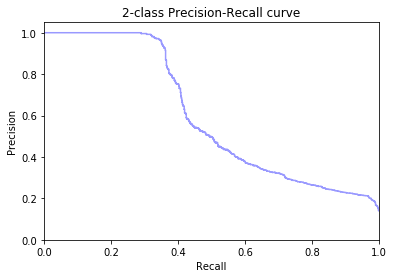

In [86]:
p_sl = model.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, p_sl[:,1])
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

Threshold cutoff:  0.274117213799871
Max F1-score at cut-off :  0.5241157556270095


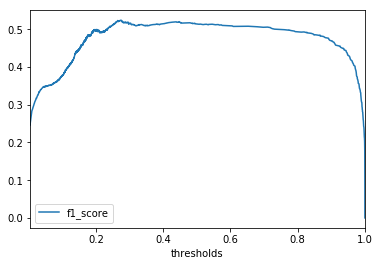

In [87]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())

thresh = scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0]

scrs.plot(x='thresholds', y='f1_score')

In [88]:
frame = scrs.loc[scrs['f1_score'] == scrs.f1_score.max()]
frame

,precision,recal,thresholds,f1_score
5325,0.751152,0.402469,0.274117,0.524116


In [89]:
cboost_thresh = frame['thresholds'].values[0]
cboost_thresh

0.274117213799871

In [90]:
model = CatBoostClassifier(iterations=950, depth=6, learning_rate=0.052, verbose=0)
model.fit(X, y, eval_set=[(X_test, y_test)], early_stopping_rounds=100)

In [91]:
test_data_predictions = model.predict(test_data)

submission = pd.DataFrame({'EmployeeNo' : testId, 'Promoted_or_Not' : test_data_predictions.astype(int)})
submission.to_csv('cboost_dday_stop.csv', index=False)

<h3>LightGBM</h3>

In [83]:
lgbm = lgb.LGBMClassifier(
    max_depth=4, n_estimators=500, subsample=0.9, colsample_bytree=0.95, learning_rate=0.07,
    random_state=42
)

cross_val_score(lgbm, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='f1', n_jobs=-1).mean()

0.4905028808564701

In [84]:
#params = {
#    'max_depth' : [4, 5, 6, 7, 8],
#    'min_child_weight' : [1, 3, 5, 10],
#    'subsample' : [0.75,  0.8, 0.85, 0.9, 1],
#    'colsample_bytree' : [0.75,  0.8, 0.85, 0.9, 1]
#}

#grid = RandomizedSearchCV(lgb.LGBMClassifier(
#    max_depth=4, n_estimators=500, subsample=0.9, colsample_bytree=0.95, learning_rate=0.07,
#    random_state=42, n_jobs=-1
#), params, cv=StratifiedKFold(n_splits=5), scoring='f1', n_jobs=-1)

#grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=0.95,
                                            importance_type='split',
                                            learning_rate=0.07, max_depth=4,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=500, n_jobs=-1,
                                            num_l...
                                            reg_lambda=0.0, silent=True,
                                            subsample=0.9,
                                            subsample_for_bin=200

In [85]:
#grid.best_params_, grid.best_score_

({'subsample': 1,
  'min_child_weight': 3,
  'max_depth': 4,
  'colsample_bytree': 1},
 0.4919582627294673)

In [88]:
#params = {
#    #'max_depth' : [4, 5, 6, 7, 8],
#    'min_child_weight' : [1, 2, 3, 4, 5],
#    'subsample' : [0.91, 0.93, 0.95, 0.97, 1],
#    'colsample_bytree' : [0.91, 0.93, 0.95, 0.97, 1]
#}

#grid = RandomizedSearchCV(lgb.LGBMClassifier(
#    max_depth=4, n_estimators=500, subsample=0.9, colsample_bytree=0.95, learning_rate=0.07,
##    random_state=42, n_jobs=-1
#), params, cv=StratifiedKFold(n_splits=5), scoring='f1', n_jobs=-1)

#grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=0.95,
                                            importance_type='split',
                                            learning_rate=0.07, max_depth=4,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=500, n_jobs=-1,
                                            num_l...
                                            random_state=42, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=True,
                                            subs

In [89]:
#grid.best_params_, grid.best_score_

({'subsample': 0.95, 'min_child_weight': 4, 'colsample_bytree': 0.93},
 0.49236855584206757)

In [90]:
#params = {
    #'max_depth' : [4, 5, 6, 7, 8],
    #'min_child_weight' : [1, 2, 3, 4, 5],
#    'subsample' : [0.94, 0.95, 0.96],
#    'colsample_bytree' : [0.92, 0.93, 0.94]
#}

#grid = RandomizedSearchCV(lgb.LGBMClassifier(min_child_weight=4,
#    max_depth=4, n_estimators=500, subsample=0.9, colsample_bytree=0.95, learning_rate=0.07,
#                                             random_state=42, n_jobs=-1
#), params, cv=StratifiedKFold(n_splits=5), scoring='f1', n_jobs=-1, n_iter=15)

#grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=0.95,
                                            importance_type='split',
                                            learning_rate=0.07, max_depth=4,
                                            min_child_samples=20,
                                            min_child_weight=4,
                                            min_split_gain=0.0,
                                            n_estimators=500, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=42, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=True,
                              

In [91]:
#grid.best_params_, grid.best_score_

({'subsample': 0.94, 'colsample_bytree': 0.93}, 0.49236855584206757)

In [99]:
lgbm = lgb.LGBMClassifier(min_child_weight=4,
    max_depth=4, n_estimators=500, subsample=0.94, colsample_bytree=0.93, learning_rate=0.07,
                                             random_state=42, n_jobs=-1
)

cross_val_score(lgbm, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='f1', n_jobs=-1).mean()

0.49236951233715986

In [100]:
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.93,
               importance_type='split', learning_rate=0.07, max_depth=4,
               min_child_samples=20, min_child_weight=4, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.94, subsample_for_bin=200000, subsample_freq=0)

In [101]:
print(f1_score(y_train, lgbm.predict(X_train)))
print(f1_score(y_test, lgbm.predict(X_test)))

0.5633967789165446
0.5115044247787611


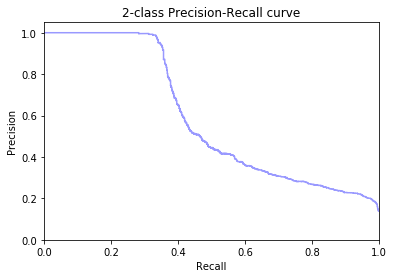

In [102]:
p_sl = lgbm.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, p_sl[:,1])
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

Threshold cutoff:  0.523074357818217
Max F1-score at cut-off :  0.5137777777777778


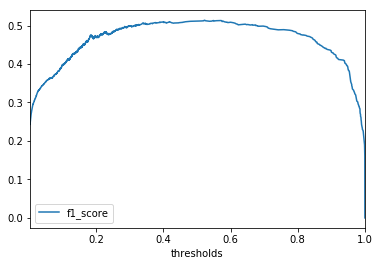

In [103]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())

thresh = scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0]

scrs.plot(x='thresholds', y='f1_score')

In [104]:
frame = scrs.loc[scrs['f1_score'] == scrs.f1_score.max()]
frame

,precision,recal,thresholds,f1_score
5530,0.91746,0.35679,0.523074,0.513778


In [105]:
lgbm_thresh = frame['thresholds'].values[0]
lgbm_thresh

0.523074357818217

<h3>XGBOOST</h3>

In [113]:
xgbm = xgb.XGBClassifier(
    max_depth=4, colsample_bytree=0.95, subsample=0.9, n_jobs=-1, random_state=42, n_estimators=500,
    learning_rate=0.07
)

cross_val_score(xgbm, X_train, y_train, scoring='f1', cv=StratifiedKFold(n_splits=5), n_jobs=-1).mean()

0.49103208967281037

In [117]:
#params = {
    #'max_depth' : [4, 5, 6, 7, 8],
#    'min_child_weight' : [2, 3, 4],
#    'subsample' : [0.85, 0.9, 0.95, 1.0],
#    'colsample_bytree' : [0.6, 0.7, 0.75,  0.8]
#}

#grid = RandomizedSearchCV(xgb.XGBClassifier(
#    max_depth=7, colsample_bytree=0.95, subsample=0.9, n_jobs=-1, random_state=42, n_estimators=500,
#    learning_rate=0.07
#), params, cv=StratifiedKFold(n_splits=5), scoring='f1', n_jobs=-1, random_state=42)

#grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=0.95, gamma=0,
                                           learning_rate=0.07, max_delta_step=0,
                                           max_depth=7, min_child_weight=1,
                                           missing=None, n_estimators=500,
                                           n_jobs=-1, nthr...
                                           random_state=42, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None,
                                           subsample=0.9, verbosity=1),
 

In [118]:
#grid.best_params_, grid.best_score_

({'subsample': 0.9, 'min_child_weight': 2, 'colsample_bytree': 0.8},
 0.49186345006775983)

In [84]:
xgbm = xgb.XGBClassifier(min_child_weight=2,
    max_depth=7, colsample_bytree=0.8, subsample=0.9, n_jobs=-1, random_state=42, n_estimators=500,
    learning_rate=0.07
)

<h3>Gradient Boosting Regression Trees</h3>

In [ ]:
gbrt = GradientBoostingClassifier(
    subsample=0.8, max_features=0.8, n_estimators=100, max_depth=4)

cross_val_score(gbrt, X_train, y_train, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring='f1').mean()

In [93]:
#params = {
#    'max_depth' : [4, 5, 6, 7],
#    'subsample' : [0.7, 0.8, 0.9], 
#    'max_features' : [0.7, 0.8, 0.9]
      
#}


#gbrt = GradientBoostingClassifier(
#    subsample=0.8, max_features=0.8, n_estimators=100, max_depth=4, random_state=42)


#grid = RandomizedSearchCV(gbrt, params, scoring='f1', cv=StratifiedKFold(n_splits=3), n_jobs=-1)
#grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=4,
                                                        max_features=0.8,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_...
                                  

In [94]:
#grid.best_params_, grid.best_score_

({'subsample': 0.9, 'max_features': 0.9, 'max_depth': 6}, 0.48699266570260186)

In [95]:
#params = {
#    #'max_depth' : [4, 5, 6, 7],
#    'subsample' : [0.81, 0.84, 0.87, 0.9, 0.92, 0.95, 1], 
#    'max_features' : [0.81, 0.84, 0.87, 0.9, 0.92, 0.95, 1]
      
#}


#gbrt = GradientBoostingClassifier(
#    subsample=0.8, max_features=0.8, n_estimators=100, max_depth=6, random_state=42)


#grid = RandomizedSearchCV(gbrt, params, scoring='f1', cv=StratifiedKFold(n_splits=3), n_jobs=-1)
#grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=6,
                                                        max_features=0.8,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_...
                                  

In [96]:
#grid.best_params_, grid.best_score_

({'subsample': 0.92, 'max_features': 0.84}, 0.48732216833976655)

In [97]:
gbrt = GradientBoostingClassifier(
    subsample=0.92, max_features=0.84, n_estimators=500, max_depth=6, learning_rate=0.07, 
    random_state=42)

cross_val_score(gbrt, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='f1', n_jobs=-1).mean()

0.48461166207173384

<h3>Bagging Classifier</h3>

In [98]:
bclf = BaggingClassifier(
    n_estimators=75, max_features=0.75, max_samples=0.7, n_jobs=-1, random_state=42
)

#params = {'max_features': [0.65, 0.7, 0.75, 0.8, 0.85, 0.9],
#          'max_samples': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85]
#             }


#grid = RandomizedSearchCV(bclf, params, scoring='f1', n_jobs=-1, cv=StratifiedKFold(n_splits=3))
#grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=BaggingClassifier(base_estimator=None,
                                               bootstrap=True,
                                               bootstrap_features=False,
                                               max_features=0.75,
                                               max_samples=0.7, n_estimators=75,
                                               n_jobs=-1, oob_score=False,
                                               random_state=42, verbose=0,
                                               warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'max_features': [0.65, 0.7, 0.75, 0.8,
                                                         0.85, 0.9],
                                        'max_samples': [0.6, 0.65, 0.7, 0.75,
                 

In [99]:
#grid.best_params_, grid.best_score_

({'max_samples': 0.8, 'max_features': 0.75}, 0.47233974430426584)

In [102]:
bclf = BaggingClassifier(
    n_estimators=500, max_features=0.75, max_samples=0.8, n_jobs=-1, random_state=42
)

cross_val_score(bclf, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='f1', n_jobs=-1).mean()

0.4712067100356216

<h3>Random Forest</h3>

In [104]:

pipe = Pipeline(
    [
        ('sampling', RandomOverSampler(random_state=42)),
        ('rfc', RandomForestClassifier(n_estimators=100, max_depth=4, max_features=0.8, n_jobs=-1,
                                       random_state=42
    ))
    ]
)

cross_val_score(pipe, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='f1', n_jobs=-1).mean()

0.32157294231073763

In [105]:
#params = {
#    'rfc__max_depth' : [4, 5, 6, 7, 8],
#    'rfc__max_features' : [0.7, 0.75, 0.78, 0.8, 0.82],
#    'rfc__min_samples_split' : np.linspace(0.00001, 0.0005, 8, endpoint=True)
#}


#pipe = Pipeline(
#    [
#        ('sampling', RandomOverSampler(random_state=42)),
#        ('rfc', RandomForestClassifier(n_estimators=40, max_depth=4, max_features=0.8, n_jobs=-1,
#                                       random_state=42
#    ))
#    ]
#)

#grid = RandomizedSearchCV(pipe, params, scoring='f1', cv=StratifiedKFold(n_splits=5), n_jobs=-1)
#grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('sampling',
                                              RandomOverSampler(random_state=42,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('rfc',
                                              RandomForestClassifier(bootstrap=True,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=4,
                        

In [106]:
#grid.best_params_, grid.best_score_

({'rfc__min_samples_split': 0.00043,
  'rfc__max_features': 0.7,
  'rfc__max_depth': 8},
 0.3601038570088278)

In [107]:
#params = {
#    'rfc__max_depth' : [7, 8, 9, 10],
#    'rfc__max_features' : [0.6, 0.65, 0.67, 0.7, 0.72, 0.75],
#    #'rfc__min_samples_split' : np.linspace(0.00001, 0.0005, 8, endpoint=True)
#}


#pipe = Pipeline(
#    [
#        ('sampling', RandomOverSampler(random_state=42)),
#        ('rfc', RandomForestClassifier(n_estimators=40, max_depth=4, max_features=0.8, n_jobs=-1,
#                                       random_state=42, min_samples_split=0.00043
#    ))
#    ]
#)

#grid = RandomizedSearchCV(pipe, params, scoring='f1', cv=StratifiedKFold(n_splits=5), n_jobs=-1)
#grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('sampling',
                                              RandomOverSampler(random_state=42,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('rfc',
                                              RandomForestClassifier(bootstrap=True,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=4,
                        

In [108]:
#grid.best_params_, grid.best_score_

({'rfc__max_features': 0.7, 'rfc__max_depth': 10}, 0.3748572209216416)

In [109]:
pipe = Pipeline(
    [
        ('sampling', RandomOverSampler(random_state=42)),
        ('rfc', RandomForestClassifier(n_estimators=500, max_depth=7, max_features=0.7, n_jobs=-1,
                                       random_state=42, min_samples_split=0.00043
    ))
    ]
)

In [110]:
cross_val_score(pipe, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='f1', n_jobs=-1).mean()

0.3519695569893816

<h3>Sorting each model out</h3>

In [111]:
model = CatBoostClassifier(iterations=950, depth=6, learning_rate=0.052)

xgbm = xgb.XGBClassifier(min_child_weight=2,
    max_depth=7, colsample_bytree=0.8, subsample=0.9, n_jobs=-1, random_state=42, n_estimators=500,
    learning_rate=0.07
)

lgbm = lgb.LGBMClassifier(min_child_weight=4,
    max_depth=4, n_estimators=500, subsample=0.94, colsample_bytree=0.93, learning_rate=0.07,
                                             random_state=42, n_jobs=-1
)

gbrt = GradientBoostingClassifier(
    subsample=0.92, max_features=0.84, n_estimators=500, max_depth=6, learning_rate=0.07, 
    random_state=42)

bclf = BaggingClassifier(
    n_estimators=500, max_features=0.75, max_samples=0.8, n_jobs=-1, random_state=42
)

rfc = Pipeline(
    [
        ('sampling', RandomOverSampler(random_state=42)),
        ('rfc', RandomForestClassifier(n_estimators=500, max_depth=7, max_features=0.7, n_jobs=-1,
                                       random_state=42, min_samples_split=0.00043
    ))
    ]
)

<h3>Ensembling by Voting</h3>

In [88]:
voting_classifier = VotingClassifier(estimators=[
    ('xgbm', xgbm),
    ('lgbm', lgbm),
    ('cat', model),
    ], voting='soft', weights=[2, 3, 5], n_jobs=-1)

#voting_classifier.fit(X_train, y_train)

In [89]:
voting_classifier.fit(X, y)

VotingClassifier(estimators=[('xgbm',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.8, gamma=0,
                                            learning_rate=0.07,
                                            max_delta_step=0, max_depth=7,
                                            min_child_weight=2, missing=None,
                                            n_estimators=500, n_jobs=-1,
                                            nthread=None,
                                            objective='binary:logistic',
                                            random_state=42, reg_alpha=0,
                                            reg_lambda=1, scale_pos_...
                                             min_child_samples=20,
                                             m

In [90]:
test_data_predictions = voting_classifier.predict(test_data)

submission = pd.DataFrame({'EmployeeNo' : testId, 'Promoted_or_Not' : test_data_predictions})
submission.to_csv('voting.csv', index=False)